In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
# MNIST dataset
from torchvision.datasets import MNIST

train_dataset = MNIST(root='data', train=True, download=True)
test_dataset = MNIST(root='data', train=False, download=True)

# Check data
print(f"train_dataset: {train_dataset[0]}")
print(f"test_dataset: {test_dataset[0]}")

train_dataset: (<PIL.Image.Image image mode=L size=28x28 at 0x313430090>, 5)
test_dataset: (<PIL.Image.Image image mode=L size=28x28 at 0x313A9D6D0>, 7)


In [2]:
import cv2

train_data = train_dataset.data.numpy()
train_labels = train_dataset.targets.numpy()
test_data = test_dataset.data.numpy()
test_labels = test_dataset.targets.numpy()
# Check data
print(f"train_data: {train_data[0]}")
print(f"train_labels: {train_labels[0]}")
print(f"test_data: {test_data[0]}")
print(f"test_labels: {test_labels[0]}")
# Check data shape
print(f"train_data shape: {train_data.shape}")
print(f"train_labels shape: {train_labels.shape}")
print(f"test_data shape: {test_data.shape}")
print(f"test_labels shape: {test_labels.shape}")

train_data: [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 25

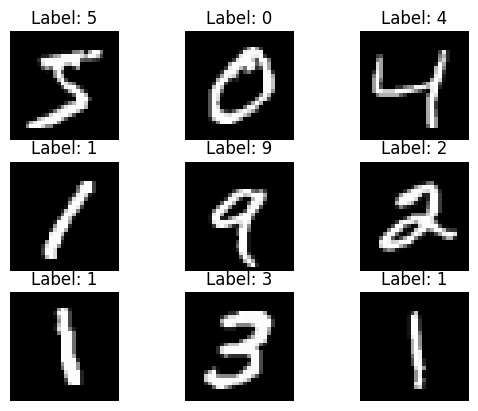

In [3]:
fig, axes = plt.subplots(3, 3)
for i in range(3):
    for j in range(3):
        axes[i, j].imshow(train_data[i * 3 + j], cmap='gray')
        axes[i, j].set_title(f"Label: {train_labels[i * 3 + j]}")
        axes[i, j].axis('off')

In [4]:
# train data
train_tensor = torch.as_tensor(train_data, dtype=torch.float32)
train_labels_tensor = torch.as_tensor(train_labels, dtype=torch.long)
# test data
test_tensor = torch.as_tensor(test_data, dtype=torch.float32)
test_labels_tensor = torch.as_tensor(test_labels, dtype=torch.long)

In [5]:
# FNN model
class FNN(nn.Module):
    def __init__(self):
        super(FNN, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 600)
        self.fc2 = nn.Linear(600, 500)
        self.fc3 = nn.Linear(500, 250)
        self.fc4 = nn.Linear(250, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return x
    
# accuracy function
def accuracy(y_pred, y_true):
    _, predicted = torch.max(y_pred, 1)
    correct = (predicted == y_true).sum().item()
    return correct / y_true.size(0)

In [6]:
def train(dataloader, epochs, model, optimizer, criterion):
    train_accuracies, train_losses = [], []
    model.train()

    for epoch in range(epochs):
        train_loss = 0
        train_accuracy = 0

        batch_count = 0
        for data, label in dataloader:
            optimizer.zero_grad()
            output = model(data)
            loss = criterion(output, label)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()
            train_accuracy += accuracy(output, label)
            batch_count += 1
        epoch_loss = train_loss / batch_count
        epoch_accuracy = train_accuracy / batch_count
        train_accuracies.append(epoch_accuracy)
        train_losses.append(epoch_loss)
        print(f"Epoch {epoch + 1}/{epochs}, Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.4f}")
    return train_accuracies, train_losses


In [7]:
batch_size = 128
train_dataset = torch.utils.data.TensorDataset(train_tensor, train_labels_tensor)
train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
epochs = 40
model = FNN()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()
train_accuracies, train_losses = train(train_dataloader, epochs, model, optimizer, criterion)

Epoch 1/40, Loss: 0.2751, Accuracy: 0.9293
Epoch 2/40, Loss: 0.1029, Accuracy: 0.9692
Epoch 3/40, Loss: 0.0788, Accuracy: 0.9762
Epoch 4/40, Loss: 0.0662, Accuracy: 0.9797
Epoch 5/40, Loss: 0.0534, Accuracy: 0.9834
Epoch 6/40, Loss: 0.0522, Accuracy: 0.9840
Epoch 7/40, Loss: 0.0466, Accuracy: 0.9864
Epoch 8/40, Loss: 0.0467, Accuracy: 0.9864
Epoch 9/40, Loss: 0.0430, Accuracy: 0.9871
Epoch 10/40, Loss: 0.0446, Accuracy: 0.9872
Epoch 11/40, Loss: 0.0389, Accuracy: 0.9888
Epoch 12/40, Loss: 0.0361, Accuracy: 0.9901
Epoch 13/40, Loss: 0.0419, Accuracy: 0.9888
Epoch 14/40, Loss: 0.0339, Accuracy: 0.9910
Epoch 15/40, Loss: 0.0254, Accuracy: 0.9927
Epoch 16/40, Loss: 0.0335, Accuracy: 0.9912
Epoch 17/40, Loss: 0.0320, Accuracy: 0.9915
Epoch 18/40, Loss: 0.0241, Accuracy: 0.9939
Epoch 19/40, Loss: 0.0339, Accuracy: 0.9918
Epoch 20/40, Loss: 0.0340, Accuracy: 0.9911
Epoch 21/40, Loss: 0.0238, Accuracy: 0.9939
Epoch 22/40, Loss: 0.0212, Accuracy: 0.9951
Epoch 23/40, Loss: 0.0303, Accuracy: 0.99

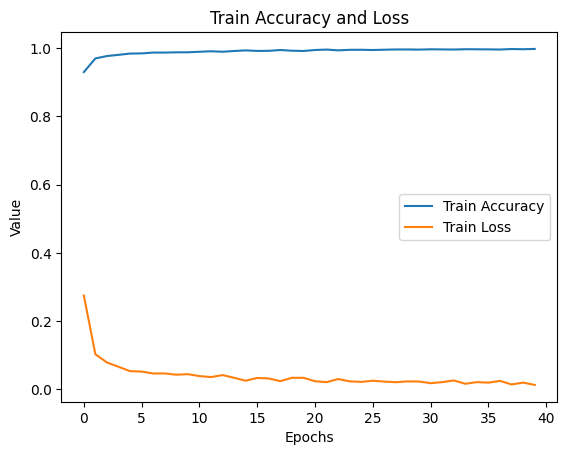

In [8]:
plt.plot(train_accuracies, label='Train Accuracy')
plt.plot(train_losses, label='Train Loss')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.title('Train Accuracy and Loss')
plt.legend()
plt.show()

Test Loss: 0.1612, Test Accuracy: 0.9806


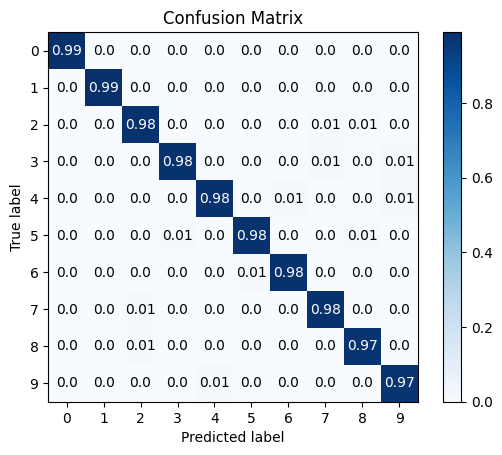

In [9]:
import scikitplot as skplt
# test data
model.eval()
test_dataset = torch.utils.data.TensorDataset(test_tensor, test_labels_tensor)
test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

val_predictions = model(test_tensor)
val_accuracy = accuracy(val_predictions, test_labels_tensor)
val_loss = criterion(val_predictions, test_labels_tensor)
print(f"Test Loss: {val_loss:.4f}, Test Accuracy: {val_accuracy:.4f}")
_, val_predicted = torch.max(val_predictions, 1)
skplt.metrics.plot_confusion_matrix(test_labels_tensor, val_predicted, normalize=True)
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# save model
torch.save(model.state_dict(), 'mnist_model.pth')
# save pred results
predictions = val_predicted.numpy()
df = pd.DataFrame(predictions, columns=['Predicted'])
df.to_csv('mnist_predictions.csv', index=False)
df.head()

,Predicted
0,7
1,2
2,1
3,0
4,4
